In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '4'

import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
import pandas as pd
df = pd.read_csv("EncodedWomen.csv")
rename_dict = {
    "Unnamed: 0": "id",
    "سن": "age",
    "اغلب شب‌ها در چه بازه‌ی زمانی می‌خوابید؟": "sleep_time",
    "اغلب صبح‌ها چه ساعتی بیدار می‌شوید؟": "wake_time",
    "سطح تحمل سر و صدا در شما چه‌گونه است؟": "noise_tolerance",
    "عادات مطالعه شما به چه صورت است؟": "study_habits",
    "شما در نظافت و سازماندهی جزو کدام دسته از افراد هستید؟": "cleanliness",
    "قومیت_ترک": "ethnicity_turk",
    "قومیت_فارس": "ethnicity_persian",
    "قومیت_لر": "ethnicity_lur",
    "قومیت_گیلک": "ethnicity_gilak",
    "قومیت_مازندرانی": "ethnicity_mazandarani",
    "قومیت_کرد": "ethnicity_kurd",
    "استان_آذربایجان غربی": "province_west_azerbaijan",
    "استان_اردبیل": "province_ardabil",
    "استان_اصفهان": "province_isfahan",
    "استان_البرز": "province_alborz",
    "استان_تهران": "province_tehran",
    "استان_خراسان رضوی": "province_khorasan_razavi",
    "استان_خوزستان": "province_khuzestan",
    "استان_زنجان": "province_zanjan",
    "استان_فارس": "province_fars",
    "استان_قزوین": "province_qazvin",
    "استان_قم": "province_qom",
    "استان_آذربایجان شرقی" : "province_azsh",
    "استان_سمنان" : "province_semnan",
    "استان_گلستان" : "province_golestan",
    "استان_گیلان" : "province_gilan",
    "رشته_جغرافیا" : "major_geo",
    "رشته_مدیریت بیمه" : "major_ins",
    "رشته_مهندسی برق-کنترل" : "major_ee_control",
    "رشته_آموزش زبان انگلیسی" : "major_eng_teach",
    "استان_لرستان": "province_lorestan",
    "استان_مازندران": "province_mazandaran",
    "استان_مرکزی": "province_markazi",
    "استان_کردستان": "province_kurdistan",
    "استان_کرمان": "province_kerman",
    "استان_کرمانشاه": "province_kermanshah",
    "استان_یزد": "province_yazd",
    "رشته_جامعه شناسی": "major_sociology",
    "رشته_حسابداری": "major_accounting",
    "رشته_حقوق": "major_law",
    "رشته_روانشناسی": "major_psychology",
    "رشته_ریاضیات و کاربردها": "major_mathematics",
    "رشته_زبان و ادبیات انگلیسی": "major_english_lit",
    "رشته_زبان و ادبیات فارسی": "major_persian_lit",
    "رشته_زیست شناسی - علوم سلولی و مولکولی": "major_biology_cellular",
    "رشته_زیست شناسی - علوم گیاهی": "major_biology_botany",
    "رشته_زیست شناسی جانوری - سلولی تکوینی": "major_biology_zoology",
    "رشته_زیست فناوری": "major_biotech",
    "رشته_شیمی محض": "major_chemistry_pure",
    "رشته_شیمی کاربردی": "major_chemistry_applied",
    "رشته_علوم ورزشی": "major_sports_science",
    "رشته_علوم کامپیوتر": "major_cs",
    "رشته_فقه و حقوق اسلامی": "major_islamic_law",
    "رشته_فیزیک": "major_physics",
    "رشته_مددکاری اجتماعی": "major_social_work",
    "رشته_مدیریت بازرگانی گرایش بازاریابی": "major_business_marketing",
    "رشته_مدیریت مالی": "major_finance",
    "رشته_مشاوره": "major_counseling",
    "رشته_مهندسی برق - کنترل": "major_electrical_control",
    "رشته_مهندسی صنایع": "major_industrial_eng",
    "رشته_مهندسی عمران": "major_civil_eng",
    "رشته_مهندسی مکانیک": "major_mechanical_eng",
    "رشته_مهندسی مکانیک گرایش تبدیل انرژی": "major_mechanical_energy",
    "رشته_مهندسی کامپیوتر - نرم افزار": "major_cs_software",
    "رشته_چندرسانه‌ای": "major_multimedia",
    "دانشکده_ادبیات و علوم انسانی": "faculty_humanities",
    "دانشکده_تربیت بدنی و علوم ورزشی": "faculty_sports",
    "دانشکده_حقوق و علوم سیاسی": "faculty_law_political",
    "دانشکده_روانشناسی و علوم تربیتی": "faculty_psychology",
    "دانشکده_شیمی": "faculty_chemistry",
    "دانشکده_علوم جغرافیایی": "faculty_geography",
    "دانشکده_علوم ریاضی و کامپیوتر": "faculty_math_cs",
    "دانشکده_علوم زیستی": "faculty_biology",
    "دانشکده_علوم مالی": "faculty_finance",
    "دانشکده_فنی مهندسی": "faculty_engineering",
    "دانشکده_فیزیک": "faculty_physics",
    "دانشکده_مدیریت": "faculty_management",
    "دانشکده_هنر و معماری": "faculty_art_architecture",
    "دین_مسلمان-سنی": "religion_sunni",
    "دین_مسلمان- شیعه": "religion_shia",
    "clusters": "clusters"
}
df.rename(columns=rename_dict, inplace=True)
df.to_csv("EncodedWomen_english.csv", index=False)
df.columns

Index(['age', 'sleep_time', 'wake_time', 'noise_tolerance', 'study_habits',
       'cleanliness', 'ethnicity_turk', 'ethnicity_persian', 'ethnicity_lur',
       'ethnicity_mazandarani', 'ethnicity_kurd', 'ethnicity_gilak',
       'province_azsh', 'province_west_azerbaijan', 'province_ardabil',
       'province_isfahan', 'province_alborz', 'province_tehran',
       'province_khorasan_razavi', 'province_khuzestan', 'province_zanjan',
       'province_semnan', 'province_fars', 'province_qazvin', 'province_qom',
       'province_lorestan', 'province_mazandaran', 'province_markazi',
       'province_kerman', 'province_kermanshah', 'province_golestan',
       'province_gilan', 'province_yazd', 'major_eng_teach', 'major_sociology',
       'major_geo', 'major_mathematics', 'major_persian_lit',
       'major_biology_cellular', 'major_biology_botany',
       'major_biology_zoology', 'major_biotech', 'major_chemistry_pure',
       'major_islamic_law', 'major_physics', 'major_social_work', 'major_

[I 2025-09-23 15:36:15,437] A new study created in memory with name: no-name-6e7c6982-3e73-4409-98bd-29c77481f83e


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-09-23 15:36:15,677] Trial 0 finished with value: -1000000.0 and parameters: {'algorithm': 'dbscan', 'metric': 'db', 'eps': 1.1169419464543868, 'min_samples': 399}. Best is trial 0 with value: -1000000.0.
[I 2025-09-23 15:36:16,650] Trial 1 finished with value: 15.945043256270326 and parameters: {'algorithm': 'gmm', 'metric': 'ch', 'n_clusters': 236}. Best is trial 1 with value: 15.945043256270326.
[I 2025-09-23 15:36:16,941] Trial 2 finished with value: 10.207915786236649 and parameters: {'algorithm': 'kmeans', 'metric': 'ch', 'n_clusters': 490}. Best is trial 1 with value: 15.945043256270326.
[I 2025-09-23 15:36:17,071] Trial 3 finished with value: -1000000.0 and parameters: {'algorithm': 'dbscan', 'metric': 'ch', 'eps': 0.2705608474522991, 'min_samples': 538}. Best is trial 1 with value: 15.945043256270326.
[I 2025-09-23 15:36:17,197] Trial 4 finished with value: -1000000.0 and parameters: {'algorithm': 'dbscan', 'metric': 'db', 'eps': 0.41420461690396065, 'min_samples': 407}

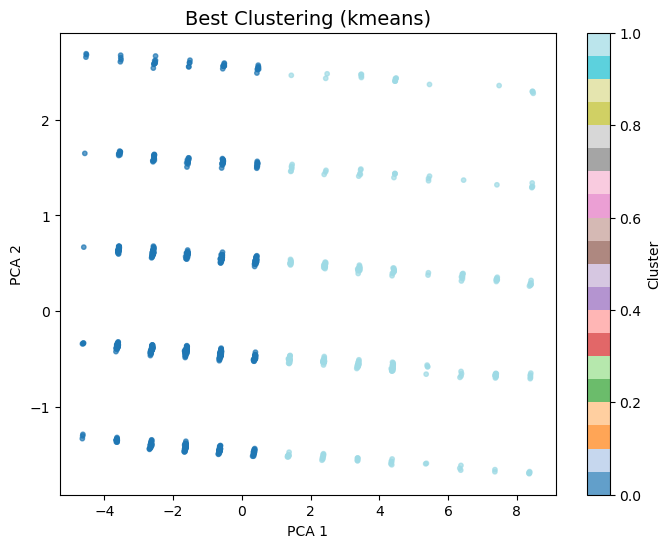

In [3]:
import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Load dataset
X = pd.read_csv("EncodedWomen_english.csv").values

# Define objective function for Optuna
def objective(trial):
    algo = trial.suggest_categorical("algorithm", ["kmeans", "agglomerative", "gmm", "dbscan"])
    metric_choice = trial.suggest_categorical("metric", ["ch", "db"])

    if algo == "kmeans":
        n_clusters = trial.suggest_int("n_clusters", 2, 600)
        model = KMeans(n_clusters=n_clusters, n_init="auto")
        labels = model.fit_predict(X)

    elif algo == "agglomerative":
        n_clusters = trial.suggest_int("n_clusters", 2, 600)
        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(X)

    elif algo == "gmm":
        n_clusters = trial.suggest_int("n_clusters", 2, 600)
        model = GaussianMixture(n_components=n_clusters)
        labels = model.fit_predict(X)

    else:  # DBSCAN
        eps = trial.suggest_float("eps", 0.1, 10.0, log=True)
        min_samples = trial.suggest_int("min_samples", 3, 600)
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        if len(np.unique(labels)) < 2:
            return -1e6

    # Evaluate
    if metric_choice == "ch":
        score = calinski_harabasz_score(X, labels)
    else:
        score = -davies_bouldin_score(X, labels)

    return score

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000,show_progress_bar=True)

print("Best Params:", study.best_params)
print("Best Score:", study.best_value)

# --- Refit best model ---
best = study.best_params
if best["algorithm"] == "kmeans":
    model = KMeans(n_clusters=best["n_clusters"], n_init="auto")
    labels = model.fit_predict(X)

elif best["algorithm"] == "agglomerative":
    model = AgglomerativeClustering(n_clusters=best["n_clusters"])
    labels = model.fit_predict(X)

elif best["algorithm"] == "gmm":
    model = GaussianMixture(n_components=best["n_clusters"])
    labels = model.fit_predict(X)

else:  # DBSCAN
    model = DBSCAN(eps=best["eps"], min_samples=best["min_samples"])
    labels = model.fit_predict(X)

# --- PCA for Visualization ---
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab20", s=10, alpha=0.7)
plt.title(f"Best Clustering ({best['algorithm']})", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster")
plt.show()


In [4]:
from kneed import KneeLocator
knee_db = KneeLocator(k_values, db_scores, curve="convex", direction="decreasing")
best_k_db = knee_db.knee

# --- Find elbow for CH (maximization) ---
knee_ch = KneeLocator(k_values, ch_scores, curve="convex", direction="increasing")
best_k_ch = knee_ch.knee

# --- Plot ---
plt.figure(figsize=(12, 5))

# DB plot
plt.subplot(1, 2, 1)
plt.plot(k_values, db_scores, marker='o', markersize=2, label="DB Index")
plt.axvline(30, color="r", linestyle="--", label=f"Elbow k={best_k_db}")
plt.title("Davies–Bouldin Index vs K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DB Index (lower is better)")
plt.legend()

# CH plot
plt.subplot(1, 2, 2)
plt.plot(k_values, ch_scores, marker='o', markersize=2, label="CH Index")
if best_k_ch is not None:
    plt.axvline(30, color="g", linestyle="--", label=f"Elbow k={best_k_ch}")
plt.title("Calinski–Harabasz Index vs K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("CH Index (higher is better)")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best k (DB index elbow): {best_k_db}")
print(f"Best k (CH index elbow): {best_k_ch}")

NameError: name 'k_values' is not defined

In [5]:
from sklearn.metrics import silhouette_score
final_silhouette = silhouette_score(X, labels)
print("Final Silhouette Score (best model):", final_silhouette)

Final Silhouette Score (best model): 0.3940429855338444


In [36]:
import pandas as pd
import numpy as np
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("EncodedWomen_english.csv")  # make sure columns are in English
X = df.select_dtypes(include=np.number).values  # numeric only

def objective(trial):
    # 1. Preprocessing options
    use_scaler = trial.suggest_categorical("use_scaler", [True, False])
    use_pca = trial.suggest_categorical("use_pca", [True, False])
    pca_components = trial.suggest_int("pca_components", 5, min(50, X.shape[1])) if use_pca else None

    X_proc = X.copy()
    if use_scaler:
        X_proc = StandardScaler().fit_transform(X_proc)
    if use_pca:
        X_proc = PCA(n_components=pca_components).fit_transform(X_proc)

    # 2. Clustering algorithm
    algo = trial.suggest_categorical("algorithm", ["kmeans", "agglomerative", "gmm", "dbscan"])

    if algo in ["kmeans", "agglomerative", "gmm"]:
        n_clusters = trial.suggest_int("n_clusters", 50, 250)

    if algo == "kmeans":
        model = KMeans(n_clusters=n_clusters, n_init="auto")
        labels = model.fit_predict(X_proc)

    elif algo == "agglomerative":
        linkage = trial.suggest_categorical("linkage", ["ward", "complete", "average", "single"])
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(X_proc)

    elif algo == "gmm":
        model = GaussianMixture(n_components=n_clusters)
        labels = model.fit_predict(X_proc)

    else:
        eps = trial.suggest_float("eps", 0.1, 10.0, log=True)
        min_samples = trial.suggest_int("min_samples", 3, 20)
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X_proc)

        if len(np.unique(labels)) < 2:
            return -1e6
            
    ch_score = calinski_harabasz_score(X_proc, labels)
    db_score = davies_bouldin_score(X_proc, labels)

    combined_score = ch_score - db_score * 100
    return combined_score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

print("Best Params:", study.best_params)
print("Best Combined Score:", study.best_value)

best = study.best_params
X_proc = X.copy()
if best["use_scaler"]:
    X_proc = StandardScaler().fit_transform(X_proc)
if best["use_pca"]:
    X_proc = PCA(n_components=best["pca_components"]).fit_transform(X_proc)

algo = best["algorithm"]
if algo == "kmeans":
    model = KMeans(n_clusters=best["n_clusters"], n_init="auto")
    labels = model.fit_predict(X_proc)
elif algo == "agglomerative":
    model = AgglomerativeClustering(n_clusters=best["n_clusters"], linkage=best["linkage"])
    labels = model.fit_predict(X_proc)
elif algo == "gmm":
    model = GaussianMixture(n_components=best["n_clusters"])
    labels = model.fit_predict(X_proc)
else:
    model = DBSCAN(eps=best["eps"], min_samples=best["min_samples"])
    labels = model.fit_predict(X_proc)

from sklearn.metrics import silhouette_score
if len(np.unique(labels)) > 1:
    final_silhouette = silhouette_score(X_proc, labels)
    print("Final Silhouette Score:", final_silhouette)

[I 2025-09-23 16:47:49,904] A new study created in memory with name: no-name-2a3ab8c2-5676-4a7f-8893-d2060f8da76e
[I 2025-09-23 16:47:50,061] Trial 0 finished with value: -99.60837457083254 and parameters: {'use_scaler': False, 'use_pca': True, 'pca_components': 16, 'algorithm': 'kmeans', 'n_clusters': 55}. Best is trial 0 with value: -99.60837457083254.
[I 2025-09-23 16:47:50,187] Trial 1 finished with value: -138.55880648094447 and parameters: {'use_scaler': False, 'use_pca': True, 'pca_components': 32, 'algorithm': 'agglomerative', 'n_clusters': 202, 'linkage': 'complete'}. Best is trial 0 with value: -99.60837457083254.
[I 2025-09-23 16:47:50,276] Trial 2 finished with value: -148.13259978825292 and parameters: {'use_scaler': False, 'use_pca': False, 'algorithm': 'agglomerative', 'n_clusters': 58, 'linkage': 'average'}. Best is trial 0 with value: -99.60837457083254.
[I 2025-09-23 16:47:50,367] Trial 3 finished with value: -381.69917231982083 and parameters: {'use_scaler': True, 'u

Best Params: {'use_scaler': False, 'use_pca': True, 'pca_components': 5, 'algorithm': 'agglomerative', 'n_clusters': 240, 'linkage': 'ward'}
Best Combined Score: 203.98875639290623
Final Silhouette Score: 0.5355817204375141


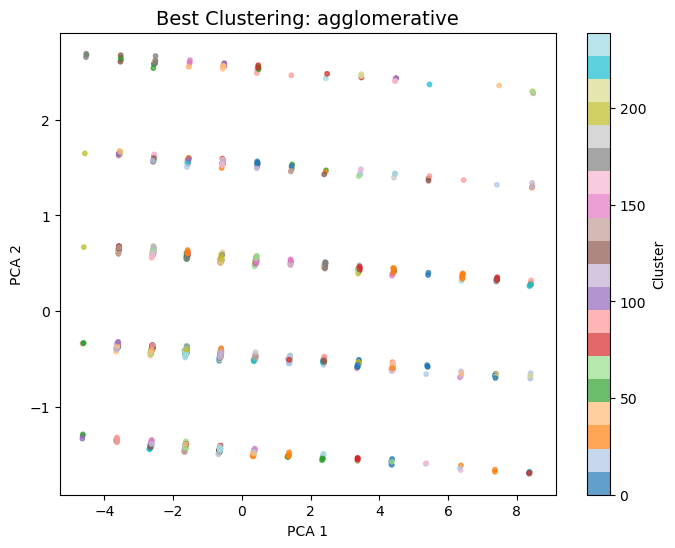

In [52]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap="tab20", s=10, alpha=0.7)
plt.title(f"Best Clustering: {algo}", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [53]:
import joblib
joblib.dump(model, f"best_{algo}_model.pkl")

['best_agglomerative_model.pkl']

In [57]:
N = 5  # top N trials
top_trials = study.trials_dataframe().sort_values("value", ascending=False).head(N)
print(top_trials)
second = study.trials[384]
params = second.params
X_proc = X.copy()
if params.get("use_scaler", False):
    X_proc = StandardScaler().fit_transform(X_proc)
if params.get("use_pca", False):
    X_proc = PCA(n_components=params["pca_components"]).fit_transform(X_proc)
algo = params["algorithm"]
if algo == "kmeans":
    model = KMeans(n_clusters=params["n_clusters"], n_init="auto")
    labels = model.fit_predict(X_proc)
final_silhouette = silhouette_score(X_proc, labels)
print("Final Silhouette Score:", final_silhouette)

     number       value             datetime_start          datetime_complete  \
408     408  203.988756 2025-09-23 16:50:16.672962 2025-09-23 16:50:16.822562   
384     384  203.547992 2025-09-23 16:50:08.150751 2025-09-23 16:50:08.512783   
281     281  203.259924 2025-09-23 16:49:34.125747 2025-09-23 16:49:34.549612   
304     304  202.193520 2025-09-23 16:49:41.789253 2025-09-23 16:49:42.151284   
462     462  201.722688 2025-09-23 16:50:34.119305 2025-09-23 16:50:34.491308   

                  duration params_algorithm  params_eps params_linkage  \
408 0 days 00:00:00.149600    agglomerative         NaN           ward   
384 0 days 00:00:00.362032           kmeans         NaN            NaN   
281 0 days 00:00:00.423865           kmeans         NaN            NaN   
304 0 days 00:00:00.362031           kmeans         NaN            NaN   
462 0 days 00:00:00.372003           kmeans         NaN            NaN   

     params_min_samples  params_n_clusters  params_pca_components  \

In [58]:
import joblib
joblib.dump(model, f"best_{algo}_model.pkl")

['best_kmeans_model.pkl']

In [60]:
df = pd.read_csv("EncodedWomen.csv")
df_label = pd.read_csv("MOCK_DATA-Women.csv")
df["Cluster"] = labels
df_label["Cluster"] = labels
df.to_csv("EncodedWomen_english.csv", index=False)
df_label.to_csv("LabeledWomen.csv", index=False)

# RandomizedCv

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import random

# --- Load dataset ---
df = pd.read_csv("EncodedWomen_english.csv")
X = df.select_dtypes(include=np.number).values

# --- Preprocess: scale and PCA ---
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=0.95)  # retain 95% variance
X_reduced = pca.fit_transform(X_scaled)

# --- Define hyperparameter grid ---
algorithms = ["kmeans", "agglomerative", "gmm"]
n_trials = 500  # number of random samples
results = []

for trial in range(n_trials):
    algo = random.choice(algorithms)

    if algo == "kmeans":
        n_clusters = random.randint(2, 500)
        model = KMeans(n_clusters=n_clusters, n_init="auto")
        labels = model.fit_predict(X_reduced)

    elif algo == "agglomerative":
        n_clusters = random.randint(2, 500)
        linkage = random.choice(["ward", "complete", "average", "single"])
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(X_reduced)

    else:
        n_clusters = random.randint(2, 500)
        cov_type = random.choice(["full", "tied", "diag", "spherical"])
        model = GaussianMixture(n_components=n_clusters, covariance_type=cov_type)
        labels = model.fit_predict(X_reduced)

    # Compute metrics
    if len(np.unique(labels)) < 2:
        continue
    sil = silhouette_score(X_reduced, labels)
    ch = calinski_harabasz_score(X_reduced, labels)
    db = davies_bouldin_score(X_reduced, labels)

    results.append({
        "algorithm": algo,
        "n_clusters": n_clusters,
        "params": model.get_params(),
        "silhouette": sil,
        "ch": ch,
        "db": db
    })
    print(sil , algo)

# --- Convert to DataFrame and sort by silhouette ---
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("silhouette", ascending=False)
print("Top 5 Randomized Search Results:")
results_df.head(5)

0.10095256327437492 agglomerative
-0.06922571745178169 agglomerative
0.1034181806643923 agglomerative
0.06728736487796921 gmm
-0.09471291762374523 agglomerative
-0.11049410543276315 agglomerative
0.07237380320277487 kmeans
-0.08478257751028055 agglomerative
0.08365550325745673 agglomerative
0.1034623011743764 gmm
0.07926846890486061 gmm
0.0778842709616963 kmeans
0.07878741133683968 gmm
0.10636955058082022 kmeans
0.09124104434874512 agglomerative
-0.07726125977081895 agglomerative
0.08422915999422877 agglomerative
0.0808607633301173 agglomerative
0.04825713401779301 gmm
0.09342486200143525 kmeans
0.05738755273242906 kmeans
0.10186766271212597 gmm
0.08732374094701098 kmeans
0.102371094310578 agglomerative
0.080246393156841 gmm
0.09760698037433124 kmeans
0.098229998597085 gmm
0.08526493062105468 gmm
0.10779972290883656 agglomerative
0.07043130414638502 gmm
0.13837562944962567 agglomerative
0.0740687137043946 kmeans
0.07260412381508091 kmeans
0.09863584333163386 gmm
0.09885706605415802 kme

,algorithm,n_clusters,params,silhouette,ch,db
455,agglomerative,4,"{'affinity': 'deprecated', 'compute_distances'...",0.221514,16.591316,1.303176
57,agglomerative,5,"{'affinity': 'deprecated', 'compute_distances'...",0.220147,16.762291,1.342042
361,agglomerative,14,"{'affinity': 'deprecated', 'compute_distances'...",0.191422,18.281500,1.421547
276,agglomerative,21,"{'affinity': 'deprecated', 'compute_distances'...",0.163466,16.836566,1.329653
270,agglomerative,2,"{'affinity': 'deprecated', 'compute_distances'...",0.144348,22.751230,1.817005


In [57]:
results_df.head(20)

,algorithm,n_clusters,params,silhouette,ch,db
223,agglomerative,2,"{'affinity': 'deprecated', 'compute_distances'...",0.287816,15.698107,1.138074
463,agglomerative,8,"{'affinity': 'deprecated', 'compute_distances'...",0.190971,8.683938,0.918329
14,agglomerative,15,"{'affinity': 'deprecated', 'compute_distances'...",0.170770,6.549217,0.815007
451,agglomerative,19,"{'affinity': 'deprecated', 'compute_distances'...",0.168372,17.384866,1.353657
17,agglomerative,393,"{'affinity': 'deprecated', 'compute_distances'...",0.140002,7.897221,1.051837
2,agglomerative,394,"{'affinity': 'deprecated', 'compute_distances'...",0.139874,7.894839,1.051484
339,agglomerative,390,"{'affinity': 'deprecated', 'compute_distances'...",0.139018,7.904572,1.056161
4,agglomerative,359,"{'affinity': 'deprecated', 'compute_distances'...",0.138431,7.999925,1.135938
49,agglomerative,428,"{'affinity': 'deprecated', 'compute_distances'...",0.138262,7.834301,0.973510
310,agglomerative,433,"{'affinity': 'deprecated', 'compute_distances'...",0.138204,7.830590,0.964404


# Kmeans - after pca with n=2

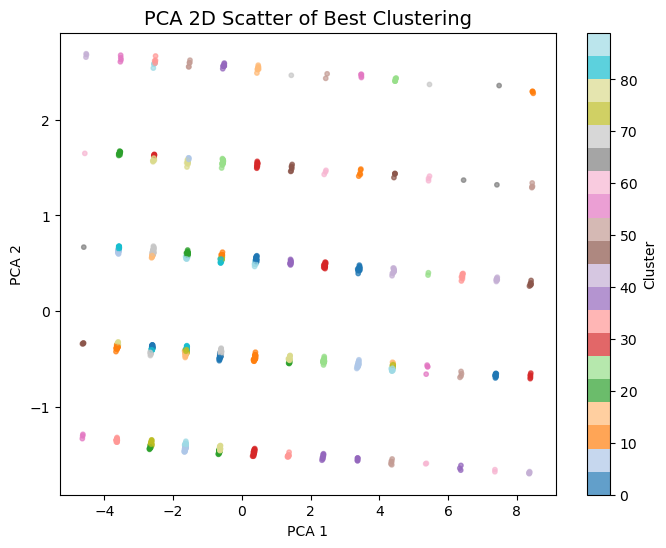

Final Silhouette Score for Best Model: 0.6474867389334098


In [63]:
pca_vis = PCA(n_components=2)
X_pca = pca_vis.fit_transform(X)

model_custom = KMeans(n_clusters=90, n_init="auto")
labels_custom = model_custom.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_custom, cmap="tab20", s=10, alpha=0.7)
plt.title("PCA 2D Scatter of Best Clustering", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

if len(np.unique(labels)) > 1:
    final_sil = silhouette_score(X_pca, labels_custom)
    print("Final Silhouette Score for Best Model:", final_sil)
else:
    print("Silhouette score could not be computed (only one cluster or all unique labels).")
df["Cluster"] = labels_custom
df.to_csv("EncodedWomen_english.csv", index=False)